In [13]:
# load data from ./data/IXI-DTI/IXI002-Guys-0828-DTI-00.nii.gz

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
# load data
data_path = './data/IXI-DTI/IXI002-Guys-0828-DTI-00.nii.gz'
data = nib.load(data_path).get_fdata()



In [14]:
# Function to add Rician noise
def add_rician_noise(image, noise_std):
    noise1 = np.random.normal(0, noise_std, image.shape)
    noise2 = np.random.normal(0, noise_std, image.shape)
    return np.sqrt((image + noise1) ** 2 + noise2 ** 2)

# Function to calculate noise, SSIM, and PSNR
def calculate_metrics(original, noisy):
    noise = noisy - original
    mean_noise = np.mean(noise)
    std_noise = np.std(noise)
    ssim_value = ssim(original, noisy, data_range=noisy.max() - noisy.min())
    psnr_value = psnr(original, noisy, data_range=noisy.max() - noisy.min())
    return mean_noise, std_noise, ssim_value, psnr_value

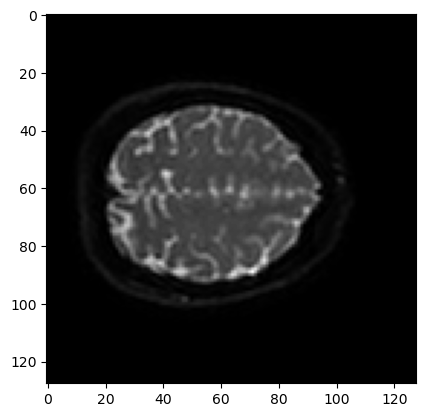

In [15]:
# show data
# plt.imshow(data[:,:,100], cmap='gray')
# IndexError: index 100 is out of bounds for axis 2 with size 56

plt.imshow(data[:,:,45], cmap='gray')
plt.show()

In [16]:
print(f"Data min: {data.min()}, max: {data.max()}")
test_noisy_data = data + np.random.normal(0, 0.01, data.shape)
mean_noise, std_noise, ssim_value, psnr_value = calculate_metrics(data, test_noisy_data)
print(f"Test with added noise - Mean Noise: {mean_noise:.4f}, Std Noise: {std_noise:.4f}, SSIM: {ssim_value:.4f}, PSNR: {psnr_value:.4f}")
small_region = data[10:20, 10:20, 10:20]
region_variance = np.var(small_region)
print(f"Variance in small region: {region_variance}")


Data min: 0.0, max: 1758.0
Test with added noise - Mean Noise: -0.0000, Std Noise: 0.0100, SSIM: 1.0000, PSNR: 104.9067
Variance in small region: 0.097959


Original Data Metrics:
Mean Noise: 0.0000, Std Noise: 0.0000, SSIM: 1.0000, PSNR: inf
Metrics after adding Rician Noise:
Mean Noise: 44.7949, Std Noise: 44.5302, SSIM: 0.4041, PSNR: 28.8572


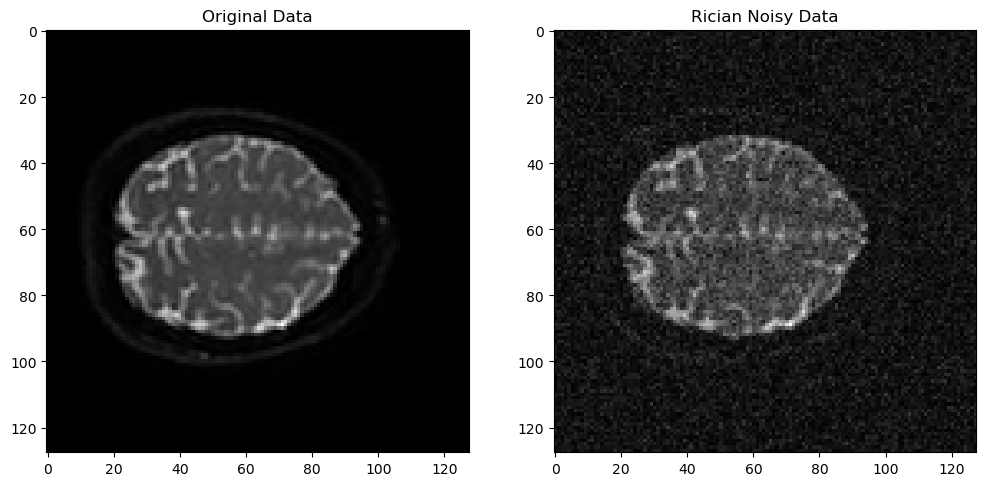

In [17]:
# Original metrics
mean_noise, std_noise, ssim_value, psnr_value = calculate_metrics(data, data)
print(f"Original Data Metrics:")
print(f"Mean Noise: {mean_noise:.4f}, Std Noise: {std_noise:.4f}, SSIM: {ssim_value:.4f}, PSNR: {psnr_value:.4f}")

# Add Rician noise
rician_noisy_data = add_rician_noise(data, noise_std=50)

# Metrics after adding Rician noise
mean_noise, std_noise, ssim_value, psnr_value = calculate_metrics(data, rician_noisy_data)
print(f"Metrics after adding Rician Noise:")
print(f"Mean Noise: {mean_noise:.4f}, Std Noise: {std_noise:.4f}, SSIM: {ssim_value:.4f}, PSNR: {psnr_value:.4f}")

# Visualization
slice_idx = 45
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data[:, :, slice_idx], cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(rician_noisy_data[:, :, slice_idx], cmap='gray')
plt.title('Rician Noisy Data')
plt.show()